In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Setting seaborn style for better aesthetics
sns.set(style="whitegrid")

In [3]:
# Load dataset
df = pd.read_csv("Amazon Sales data.csv")

# Display first few rows
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
# Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Extract year and month from Order Date
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Year-Month'] = df['Order Date'].dt.to_period('M')

# Display first few rows to check the new columns
df.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Year,Order Month,Order Year-Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,2012-08
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2014-05
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,2014-06
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,2013-02


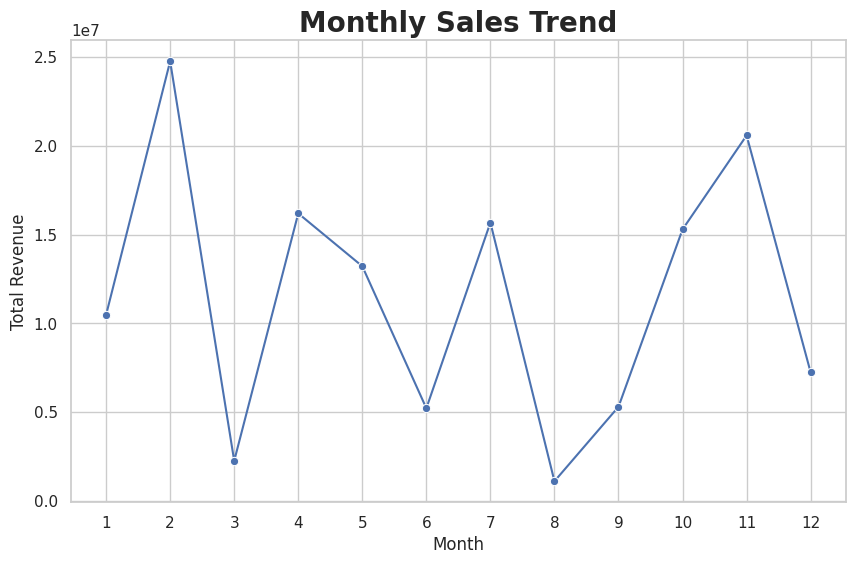

In [24]:
# Group by month and calculate total sales
monthly_sales = df.groupby('Order Month')['Total Revenue'].sum().reset_index()

# Plot monthly sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Order Month', y='Total Revenue', marker='o')
plt.title('Monthly Sales Trend', fontsize=20, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(np.arange(1, 13, step=1))
plt.grid(True)
plt.show()

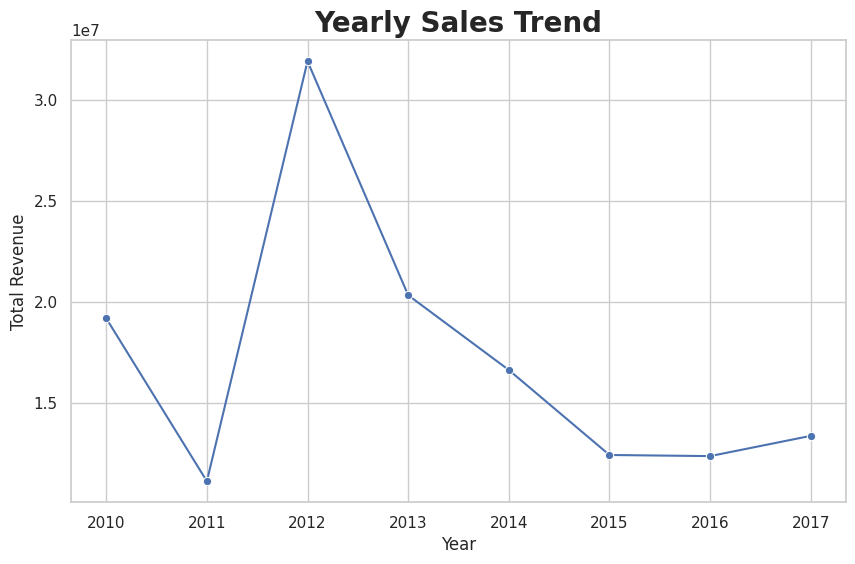

In [23]:
# Group by year and calculate total sales
yearly_sales = df.groupby('Order Year')['Total Revenue'].sum().reset_index()

# Plot yearly sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_sales, x='Order Year', y='Total Revenue', marker='o')
plt.title('Yearly Sales Trend', fontsize=20, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()


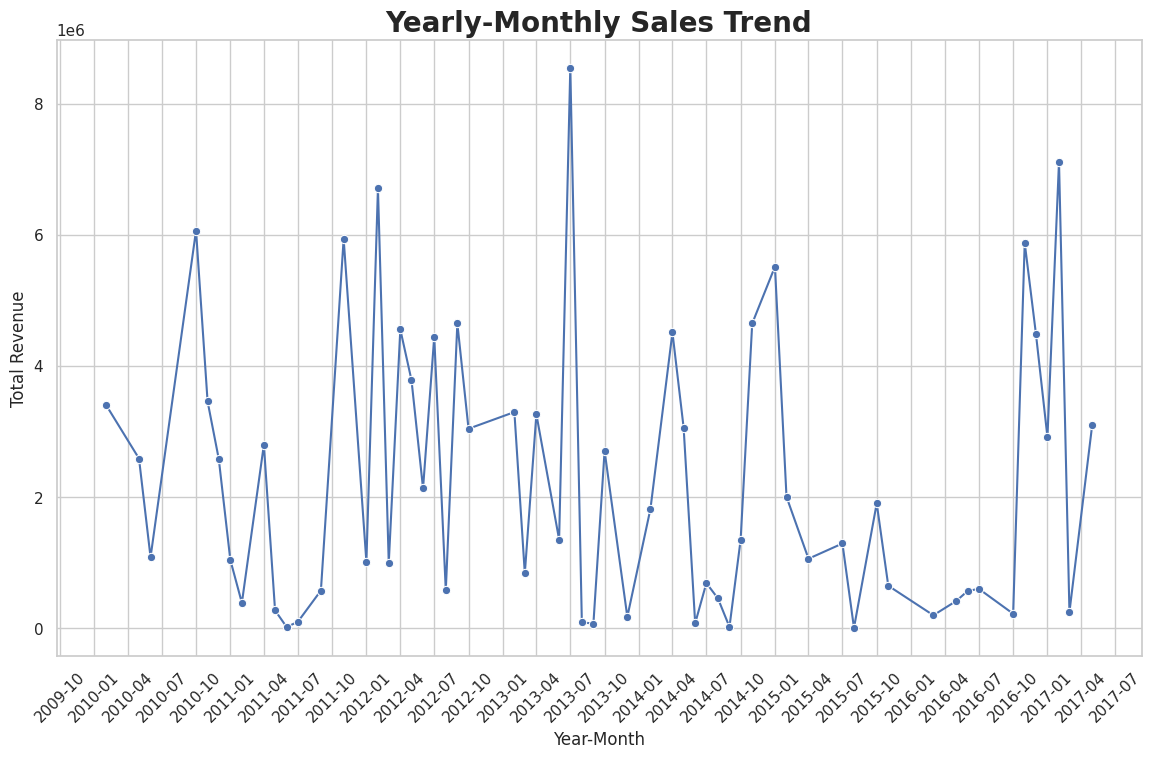

In [22]:
# Group by year and month and calculate total sales
yearly_monthly_sales = df.groupby('Order Year-Month')['Total Revenue'].sum().reset_index()

# Convert period to timestamp for plotting
yearly_monthly_sales['Order Year-Month'] = yearly_monthly_sales['Order Year-Month'].dt.to_timestamp()

# Plot yearly-monthly sales trend
plt.figure(figsize=(14, 8))
sns.lineplot(data=yearly_monthly_sales, x='Order Year-Month', y='Total Revenue', marker='o')
plt.title('Yearly-Monthly Sales Trend', fontsize=20, fontweight='bold')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)


# Format the x-axis to show dates correctly
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show every 3rd month for readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.show()

In [8]:
#Key Metrics

total_sales = df['Total Revenue'].sum()
total_profit = df['Total Profit'].sum()
average_unit_price = df['Unit Price'].mean()
average_unit_cost = df['Unit Cost'].mean()
units_sold = df['Units Sold'].sum()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Average Unit Price: ${average_unit_price:,.2f}")
print(f"Average Unit Cost: ${average_unit_cost:,.2f}")
print(f"Total Units Sold: {units_sold:,.0f}")

Total Sales: $137,348,768.31
Total Profit: $44,168,198.40
Average Unit Price: $276.76
Average Unit Cost: $191.05
Total Units Sold: 512,871


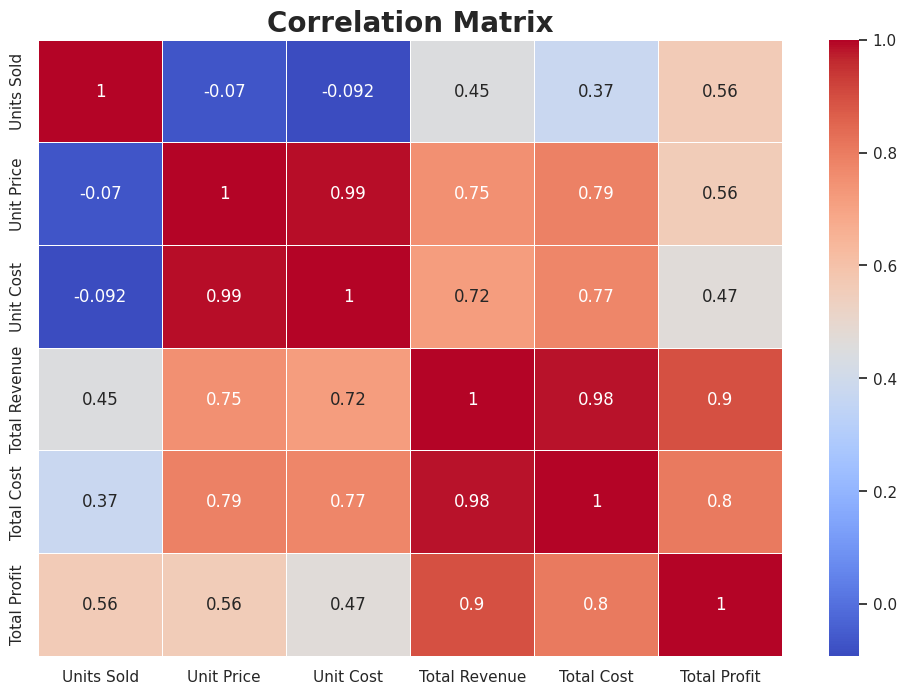

In [21]:
# Calculate correlation matrix
correlation_matrix = df[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=20, fontweight='bold')
plt.show()


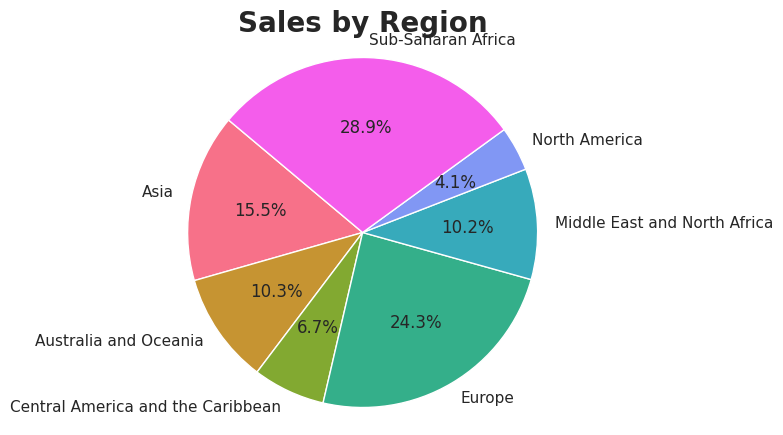

In [19]:
# Group by region and calculate total sales
region_sales = df.groupby('Region')['Total Revenue'].sum().reset_index()

# Define a color palette with a unique color for each region
colors = sns.color_palette('husl', len(region_sales))

# Plot sales by region as a pie chart
plt.figure(figsize=(6, 5))
plt.pie(region_sales['Total Revenue'], labels=region_sales['Region'], colors=colors, autopct='%1.1f%%', startangle=140)
# Title with bold
plt.title('Sales by Region', fontsize=20, fontweight='bold')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<ipython-input-20-56571b83bd60>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=item_sales, x='Item Type', y='Total Revenue', palette=colors)


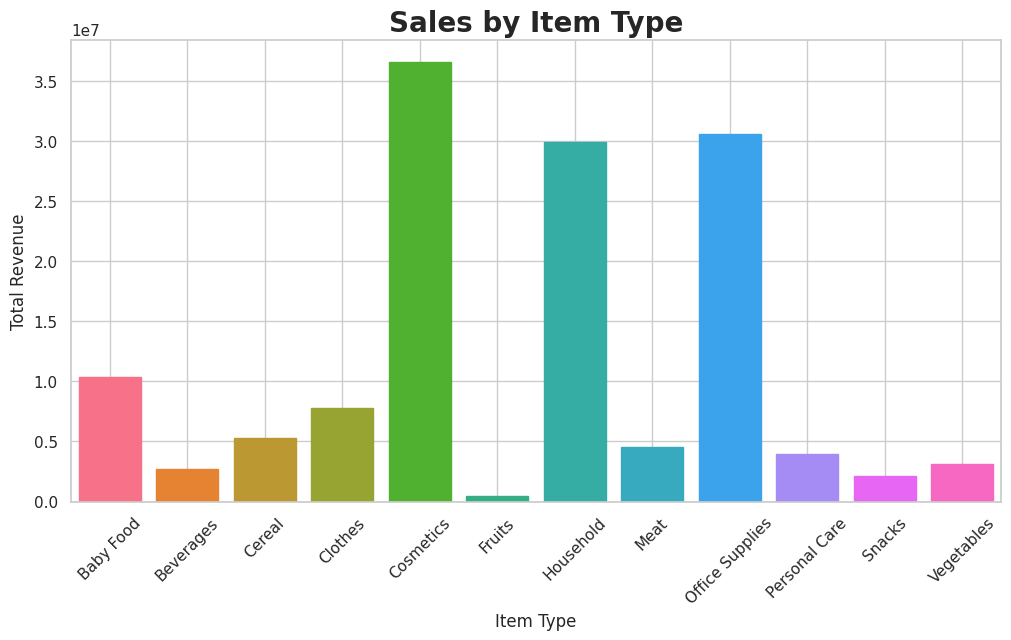

In [20]:
# Group by item type and calculate total sales
item_sales = df.groupby('Item Type')['Total Revenue'].sum().reset_index()

# Define a color palette with a unique color for each item type
colors = sns.color_palette('husl', len(item_sales))

# Plot sales by item type with different colors
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=item_sales, x='Item Type', y='Total Revenue', palette=colors)
plt.title('Sales by Item Type', fontsize=20, fontweight='bold')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)

# Add color legends
for i, bar in enumerate(bar_plot.patches):
  bar.set_color(colors[i])

plt.show()